In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.model_selection import KFold
import math

%matplotlib inline
plt.style.use('seaborn-white')

# Lasso Overview

Least Absolute Shrinkage and Selection Operator

Objective Function:

Derivation of Coordinate descent for Lasso Regression

$$ \begin{eqnarray}
\underset{\beta}{\mathrm{argmin}} RSS_{lasso} (\beta) &=& \frac{1}{2}RSS_{OLS} (\beta) + \lambda |\beta|_{1}\\
&=& \underset{\beta}{\mathrm{argmin}} \frac{1}{2} ||y - (\beta)X)||^{2}_{2} + \lambda |\beta|_{1} \\ 
&=& f(\beta) + g(\beta)
\end{eqnarray}$$

where A is the $RSS_{OLS}$ term, and B is the regularization factor for Lasso.

We isolate the $\beta_{j}$ via 

where,
$f(\beta)$ = $\frac{1}{2} ||y - (\beta)'X)||^{2}_{2}$ is the $RSS_{OLS}$
$g(\beta)$ = $\lambda |\beta|_{1}$ is the regularization factor.
Note: Regularization factor means that the new loss function (error of the fit) penalizes if $\beta$ has too large a variance/deviation. 

After applying some subdifferentials and subderivatives, we find that the Objective function becomes: 

$RSS_{Lasso}(\beta) = RSS_{OLS}(\beta) + \lambda ||\beta||_{1}$

$$ \begin{eqnarray}
\frac{\partial d}{\partial d\beta_{j}} RSS_{Lasso} + \partial \beta_{j} \lambda \sum^{n}_{j=0} |\beta_{j}| \\
&=& - \sum^{m}_{i=0} x_{j}^{(i)} [y^{(i)} - \sum^{n}_{k \ne j} \theta_{k}x_{k}^{(i)}] + \theta_{j} \sum^{m}_{i=1}(x_{j}^{(i)})^{2} + \partial_{\beta_{j} \lambda|\beta_{j}| \\ 
&=& - \rho_{j} +  \beta_{j}z + \partial_{\beta_{j} \lambda|\beta_{j}| \\ 
\end{eqnarray}$$


SR3: Sparse Relaxed Regularized Regression 
    - Better numerical properties. Relaxed coordinates.

Proposed strategy:
- Use Soft-thresholding operator using coordinate descent algorithms
- Tuning lambda:
    - Define a range of lambda values.
    - Bootstrap sets of size math.ceil(n/k). 
    - For each lambda value k, train lasso model on all sets.
    - Obtain MSE of lasso models for all sets with lambda = k.
    - Find mean MSE for each lambda=k.
    - Find lambda value with minimum mean MSE.

Notes on Lasso:

Video 2: Steve Brunton from UW

- For variable selection and getting interpretable regression models that don't overfit to data.
- Feature selection: 
    - LASSO can provide a sparse solution $\overrightarrow{\beta}$-- hence feature selection.

- Attributes:
    - Interpretability:
        - OLS is not interpretable because all variables are considered important. OLS selects important variables.
        - Lower dimensional models (if similarly good at minimizing error), is easier to interpret, communicate and make decisions. (principle of parsimony).
    - Prevents overfitting:
        - OLS: x coefficients may overfit A to data in b. (modelling noise and reducing generalizability)
        - When $\lambda$ increases past $\lambda_{lasso}$, MSE starts increasing again because we are adding in terms that are collinear and not actually correlated with response variable. 
    - Multicollinearity:
        - When variables are collinear, OLS amplifies noise in response vector (nearly linearly dependent).

- Geometric Visualization:
    - L1 norm intersects space of all possible solutions at a sparse solution. L1 norm intersects at a dense solution. 

### Lasso from scratch begins here: 

1. The setup: design matrix and response variable (price).
2. Two functions: soft_thresholding and coordinate_descent_lasso are created. 
    - soft_thresholding: returns value of objective function based on values of rho and lamda.
    - coordinate_descent_lasso: returns 
We use a coordinate descent algorithm to solve the lasso regression problem.

In [54]:
#Loading in Data
df = pd.read_csv("../data/listings.csv")

In [8]:
df.drop(df.columns[0], axis=1, inplace=True)

In [9]:
df_numpy = df.to_numpy()
X_df = df.iloc[:,1:-1]
y_df = df[["price"]]
X = X_df.to_numpy()
y = y_df.to_numpy()
y = y.reshape(-1,1)

In [10]:
np.shape(df) # 38837 x 232

(38837, 232)

In [56]:
cols

['minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'neighbourhood_Allerton',
 'neighbourhood_Arden Heights',
 'neighbourhood_Arrochar',
 'neighbourhood_Arverne',
 'neighbourhood_Astoria',
 'neighbourhood_Bath Beach',
 'neighbourhood_Battery Park City',
 'neighbourhood_Bay Ridge',
 'neighbourhood_Bay Terrace',
 'neighbourhood_Bay Terrace, Staten Island',
 'neighbourhood_Baychester',
 'neighbourhood_Bayside',
 'neighbourhood_Bayswater',
 'neighbourhood_Bedford-Stuyvesant',
 'neighbourhood_Belle Harbor',
 'neighbourhood_Bellerose',
 'neighbourhood_Belmont',
 'neighbourhood_Bensonhurst',
 'neighbourhood_Bergen Beach',
 'neighbourhood_Boerum Hill',
 'neighbourhood_Borough Park',
 'neighbourhood_Breezy Point',
 'neighbourhood_Briarwood',
 'neighbourhood_Brighto

In [81]:
X = df[
    [
        "minimum_nights",
        "number_of_reviews",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
        "neighbourhood_group_Bronx",
        "neighbourhood_group_Brooklyn",
        "neighbourhood_group_Manhattan",
        "neighbourhood_group_Queens",
        "neighbourhood_group_Staten Island",
        "neighborhood_Midtown",
        "neighbourhood_Lower East Side",
        "neighbourhood_Harlem",
        "neighbourhood_Upper East Side",
        "neighbourhood_Upper West Side",
        "neighbourhood_Washington Heights",
        "neighbourhood_East Harlem",
        "neighbourhood_Chinatown",
        "neighbourhood_East Village",
        "neighbourhood_Financial District",
        "neighbourhood_Morningside Heights",
        "neighbourhood_Inwood",
        "neighbourhood_Hell's Kitchen",
        "neighbourhood_Battery Park City",
        "neighbourhood_Chelsea",
        "neighbourhood_Two Bridges",
        "neighbourhood_Gramercy",
        "neighbourhood_NoHo",
        "neighbourhood_Greenwich Village",
        "neighbourhood_SoHo",
        "room_type_Entire home/apt",
        "room_type_Private room"
    ]
]
X = X.to_numpy()
y = df[["price"]]
y = y.to_numpy()

KeyError: "['neighborhood_Midtown'] not in index"

In [71]:
# Creating train and test sets: 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [72]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0

In [73]:
def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

In [74]:
cols = list(X_df.columns)

In [75]:
np.shape(X_train)

(31069, 15)

(0.0446683592150963, 2238721.138568338, -2944.97295496096, 18439.97041251776)

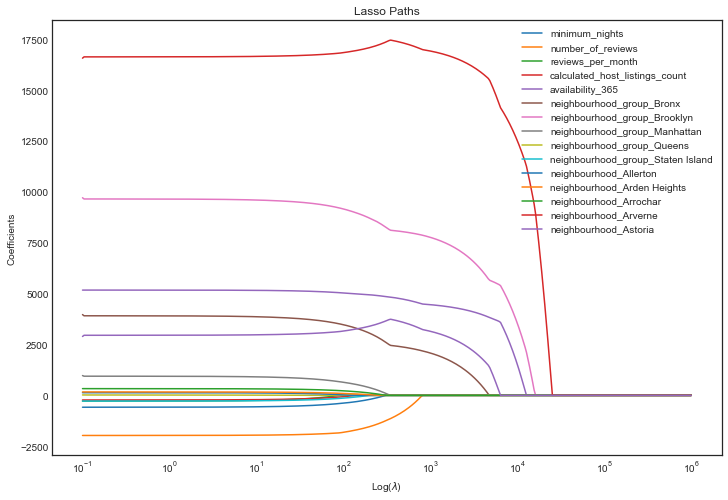

In [78]:
# Initialize variables
m,n = X_train.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,7,400)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X_train,y_train,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = cols[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.legend()
plt.axis('tight')

### Tuning Lambda
We conduct 10-fold cross validation:

1. Split training set into 10 partitions. 
2. For each of 200 lambda values, train 10 lasso models based on the train and test indices.
3. For each lambda value, find the mean MAE of the 10 lasso models. 
3. Select lambda = k that has lowest mean MAE.

In [114]:
# Bootstrapping 10 sets of observations. 
'''
def bootstrap(k,X_df,y_df,response_name,design_names):
    '''
    #k: number of random splits to generate (with resampling)
    #df: pandas dataframe containing design matrix and response variable values.
    #response_name: name (string) of response variable. 
    #design_names: list of strings that are predictor variable names.
    
    #Returns 
    #    sample_X (dim: k x n x (p-1)) array containing k design matrices.
    #    sample_y (dim: k x n x 1) array containing k response vectors.
    '''
    n,p = np.shape(X_df)
    sample_X = np.empty(shape=(k,math.ceil(n/k),p)) 
    sample_y = np.empty(shape=(k,math.ceil(n/k),1)) 
    for i in range(k):
        split = X_df.sample(frac=1/k,random_state=200)
        split_X = split[design_names] 
        split_y = split[[response_name]]
        sample_X[i] = split_X.to_numpy()
        sample_y[i] = split_y.to_numpy()
        
    return sample_X,sample_y # sample_X is k x n x p, sample_y is k x n x 1
'''`

In [80]:
def lambda_tune(X_train,y_train):
    
    all_mae = list() # 200 total entries (lambda), each entry has 10 entries (10-fold)
    lamda = np.logspace(0,7,400)/10 #Range of lambda values
    
    kf = KFold(n_splits = 10, random_state = True, shuffle = True)

    for l in lamda:                                             # Iterate through all lambda (200)
        mae_vals = list()                                       # list of MAE values for each lambda. Resets for each lambda
        
        for train_index, test_index in kf.split(X_train):       # Iterate through each of 10 folds for each lamda 
            temp_X_train = X_train[train_index]
            temp_y_train = y_train[train_index]
            temp_X_test = X_train[test_index]
            temp_y_test = y_train[test_index]
            
            n,p = temp_X_train.shape
            initial_theta = np.ones((p,1))
            MAE = 0

            theta = coordinate_descent_lasso(initial_theta,temp_X_train,temp_y_train,lamda = l, num_iters=100) # fit lasso model
            y_pred = temp_X_test @ theta                         # Predicted response values based on beta coefficients
            for i in range(len(test_index)):
                MAE += abs(temp_y_test[i][0] - y_pred[i])
            MAE = MAE/n                                         # Finding MAE of each lasso model (10) for each lambda (200)
            mae_vals.append(MAE)
        all_mae.append(mae_vals)                                # Appending 10 MAE values from 10 fitted lasso models
    return all_mae, lamda

all_mae,lamda = lambda_tune(X_train,y_train)

In [86]:
np.shape(all_mae)

(400, 10)

In [85]:
np.shape(lamda)

(400,)

In [90]:
all_mae

[[60613.22298584077,
  59086.07826492813,
  58673.286859303545,
  59003.78890259201,
  58742.53335443707,
  59571.41180179076,
  58778.393748618364,
  59156.279249409956,
  61950.64243324374,
  59626.68842109172],
 [60613.16766814605,
  59086.02490750983,
  58673.23237248335,
  59003.7346918091,
  58742.47598088262,
  59571.3583956121,
  58778.33804386809,
  59156.226245302,
  61950.58251737339,
  59626.631894882026],
 [60613.11007007604,
  59085.96935052474,
  58673.17564134335,
  59003.67824628147,
  58742.41624220315,
  59571.302787857145,
  58778.280042786675,
  59156.17105619202,
  61950.52013157613,
  59626.57303847782],
 [60613.05009762609,
  59085.911503300034,
  58673.116575659405,
  59003.61947388518,
  58742.3540409012,
  59571.24488776913,
  58778.21965071201,
  59156.11359200701,
  61950.455174033006,
  59626.511755821135],
 [60612.98765291617,
  59085.851271424086,
  58673.05507509588,
  59003.55827869941,
  58742.289275458876,
  59571.184600851426,
  58778.156769079214,


In [91]:
all_mae[0][1]

59086.07826492813

No handles with labels found to put in legend.


(0.0446683592150963,
 2238721.138568338,
 -3081.4024063342417,
 65047.406473223644)

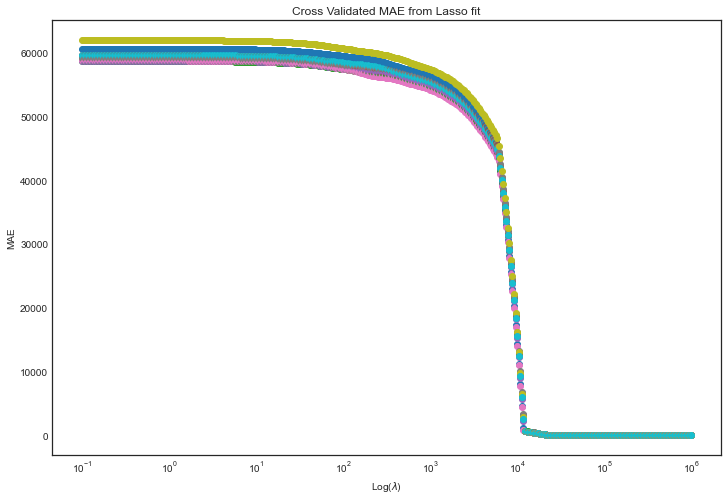

In [94]:
# Plotting MAE against lamda

n = 400
plt.figure(figsize = (12,8))

for i in range(n):
    for j in range(10):
        plt.scatter(lamda[i], all_mae[i][j])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('MAE')
plt.title('Cross Validated MAE from Lasso fit')
plt.legend()
plt.axis('tight')